# 1. AutoRegressive Moving Average model (ARMA) 정의
- AR(p)와 MA(q)를 합친 모델
$$X_t \ = \ Noise \ +\ AutoRegressive\ Part \ +\ Moving \ Average \ Part$$
$$X_t \ = \ Z_t+ (\phi_1X_{t-1}+ \dots + \phi_pX_{t-p}) +( \theta_1Z_{t-1}+ \dots + \theta_qZ_{t-q})$$

- Autoregressive with Backwards Difference
$$\phi(B)X_t=X_t-\phi_1X_{t-1}- \dots - \phi_pX_{t-p}$$
$$\phi(B)=1-\phi_1B-\phi_2B^2- \dots -\phi_pB^p$$
- Moving Average with Backwards Difference
$$\theta(B)Z_t=Z_t+\theta_1Z_{t-1}+ \dots + \theta_qZ_{t-q}$$
$$\theta(B)=1+\theta_1B+ \dots +\theta_qB^q$$

- 종합
$$X_t -(\phi_1X_{t-1}+ \dots + \phi_pX_{t-p}) \ = \ Z_t+ ( \theta_1Z_{t-1}+ \dots + \theta_qZ_{t-q})$$
$$\theta(B)Z_t=\phi(B)X_t$$
- 위의 (autoregressive process$(X_t)$와 moving average process$(Z_t)$의) mixed process를 서로의 process로 표현하기 위해 polynomial operators 사용 
  - Moving Average로 표현
$$\frac{\theta(B)}{\phi(B)}Z_t=X_t \quad (\text{where,  } \psi=\frac{\theta(B)}{\phi(B)} )$$ 
  - Moving Average로 표현
$$Z_t=\frac{\phi(B)}{\theta(B)}X_t \quad (\text{where,  }\pi=\frac{\phi(B)}{\theta(B)} )$$

## 예시
$X_t=0.7X_{t-1}+Z_t+0.2Z_{t-1}$

$(1-0.7B)X_t=(1+0.2B)Z_t$ <br>
$\theta(B)=1+\beta_1B=1+0.2B$ <br>
$\phi(B)=1-\alpha_1B=1-0.7B$


$\pi(B) = \frac{\phi(B)}{\theta(B)}=\frac{1-0.7B}{1+0.2B}= (1-0.7B)(1+0.2B)^{-1}$ <br>
$\pi(B) = (1-0.7B)(1-0.2B+(-0.2)^2B^2+(-0.2)^3B^3 + \dots$ <br>
$\pi(B)=1-0.9B+0.18B^2-0.036B^3+ \dots$


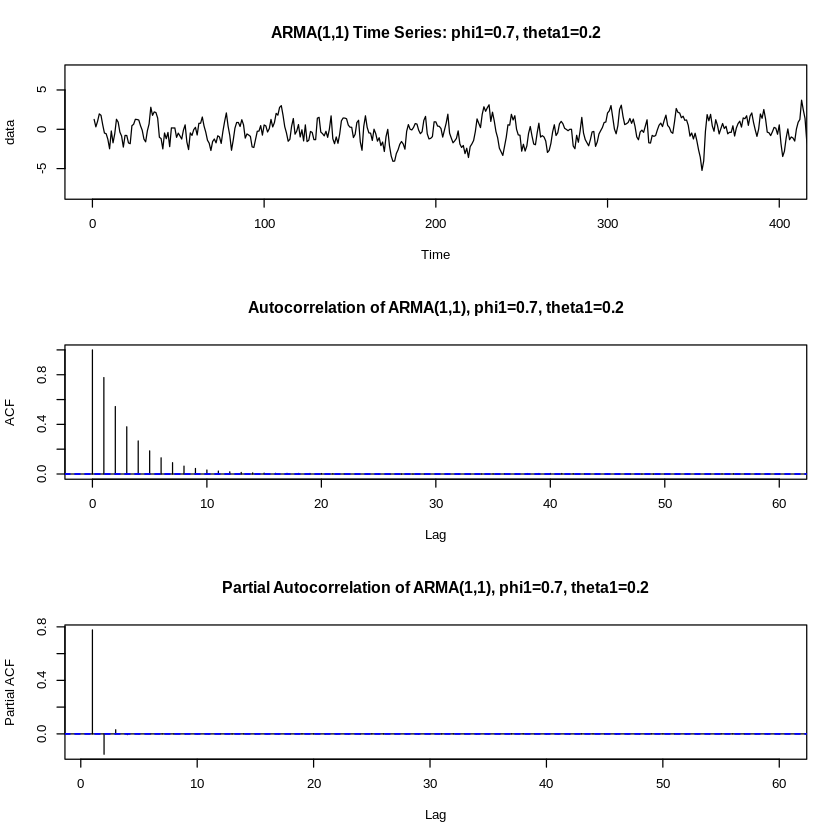

In [2]:
set.seed(500)

# 시뮬레이션 모델 생성
data=arima.sim(list(order=c(1,0,1), ar=0.7, ma=0.2), n=1000000)

par(mfcol=c(3,1))

# 첫번째 항
plot(data, main='ARMA(1,1) Time Series: phi1=0.7, theta1=0.2', xlim=c(0,400))
acf(data, main='Autocorrelation of ARMA(1,1), phi1=0.7, theta1=0.2')
acf(data, type='partial', main='Partial Autocorrelation of ARMA(1,1), phi1=0.7, theta1=0.2')

# 2. ARMA 모델의 p,q 및 coefficients 찾기 

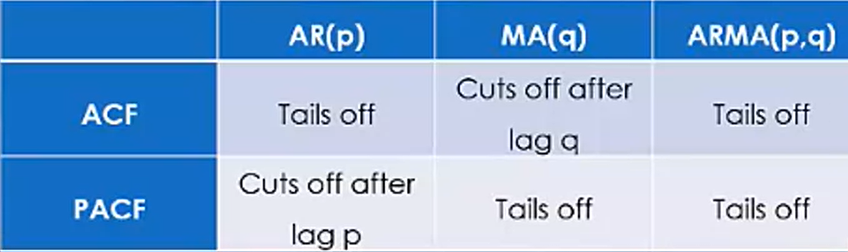

- discoveries 데이터셋으로 확인
  - The numbers of “great” inventions and scientific discoveries in each year from 1860 to 1959.

In [1]:
library()

In [2]:
install.packages("discoveries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘discoveries’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [3]:
help('discoveries')

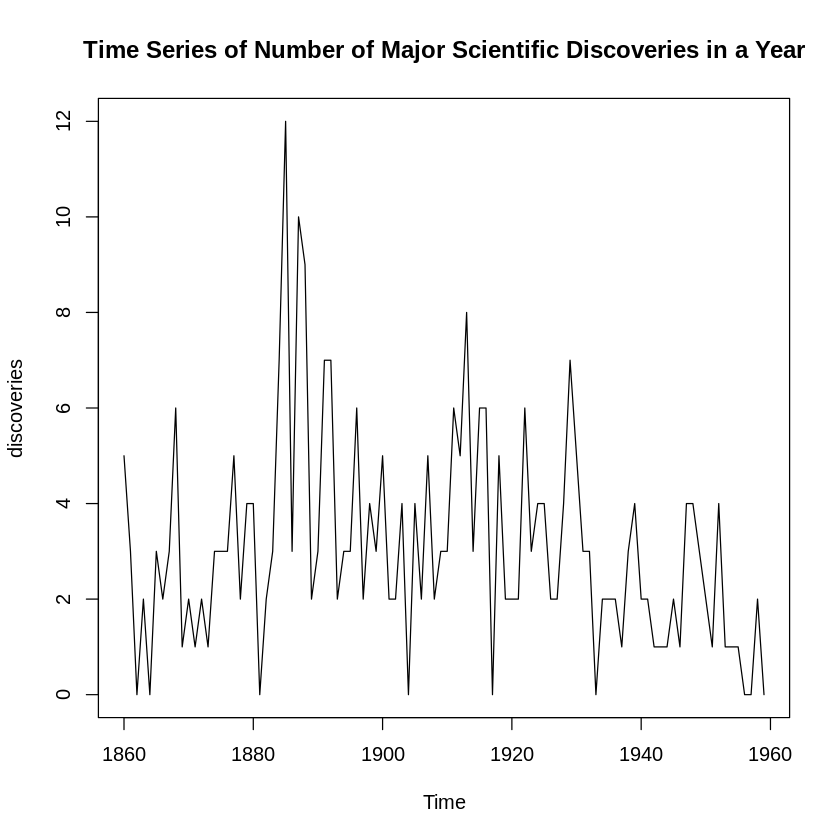

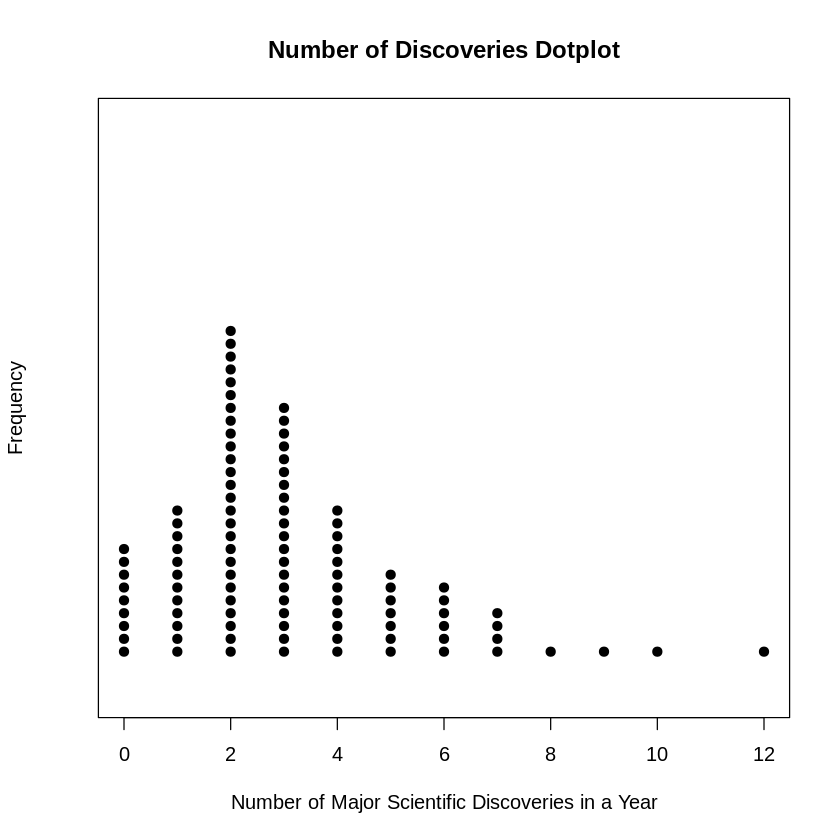

In [7]:
plot(discoveries, main='Time Series of Number of Major Scientific Discoveries in a Year')
stripchart(discoveries, method='stack', offset=0.5, at=0.15, pch=19,
           main='Number of Discoveries Dotplot',
           xlab='Number of Major Scientific Discoveries in a Year',
           ylab='Frequency')

## 최적 파라미터 및 계수 확인 

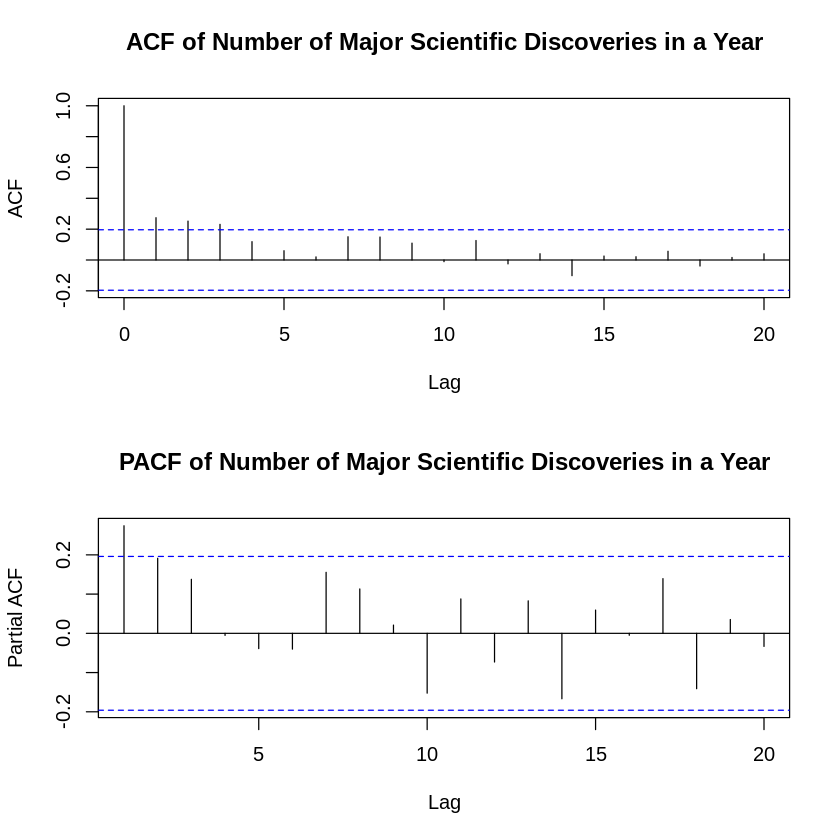

In [6]:
par(mfcol=c(2,1))
acf(discoveries, main='ACF of Number of Major Scientific Discoveries in a Year')
acf(discoveries, type='partial', main='PACF of Number of Major Scientific Discoveries in a Year')

=> lag 몇에서 정확히 cuts off 되는지 명확하지 않음 <br>
ACF : possibly q=0,1,2,3  /  PACF : possibly p=0,1,2   <br>
이런 경우 다른 지표들(AIC, SSE 등)을 활용해서 비교

최적 파라미터 확인 지표
- Akaike Information Critetrion (AIC)
- Bayesian Information Criterion (BIC)
- corrected AIC (AICC)

In [9]:
# 방법1) 직접 AIC() 함수값 비교

print(AIC(arima(discoveries, order=c(1,0,1))))
print(AIC(arima(discoveries, order=c(3,0,2))))

[1] 440.198
[1] 439.9263


In [10]:
# 방법2) 직접 arima() 모델 돌려서 aic값 확인
arima(x=discoveries, order=c(1,0,1))


Call:
arima(x = discoveries, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.8353  -0.6243     3.0208
s.e.  0.1379   0.1948     0.4728

sigma^2 estimated as 4.401:  log likelihood = -216.1,  aic = 440.2

In [12]:
# 방법3) forecast package의 auto.arima() 이용하여 최적 파라미터 자동으로 도출
## approximation = (length(x)>100 | frequency(x)>12)

install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [14]:
auto.arima(discoveries, d=0, approximation=FALSE)

Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 = 4.538:  log likelihood = -216.1
AIC=440.2   AICc=440.62   BIC=450.62

In [15]:
auto.arima(discoveries, d=0, ic='bic', approximation=FALSE) # 최적: ARIMA(1,0,1)
auto.arima(discoveries, d=0, ic='aic', approximation=FALSE) # 최적: ARIMA(3,0,0)
auto.arima(discoveries, d=0, ic='aic', approximation=TRUE) # 최적: ARIMA(1,0,1)

Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 = 4.538:  log likelihood = -216.1
AIC=440.2   AICc=440.62   BIC=450.62

Series: discoveries 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     ar3    mean
      0.1967  0.1613  0.1451  3.0637
s.e.  0.0995  0.0998  0.1007  0.4136

sigma^2 = 4.556:  log likelihood = -215.78
AIC=441.57   AICc=442.2   BIC=454.59

Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 = 4.538:  log likelihood = -216.1
AIC=440.2   AICc=440.62   BIC=450.62